In [ ]:
# Setup & Library Installation ---
# Install essential packages
%pip install snscrape pandas numpy nltk scikit-learn matplotlib seaborn wordcloud

%pip install --upgrade --force-reinstall git+https://github.com/JustAnotherArchivist/snscrape.git

# Download required NLTK data (stopwords, tokenizers, lemmatizer, sentiment lexicon)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

print("✅ Setup complete.")


  Cloning https://github.com/JustAnotherArchivist/snscrape.git to c:\users\iankw\appdata\local\temp\pip-req-build-y1mibrnq
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit 614d4c2029a62d348ca56598f87c425966aaec66
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached lxml-6.0.2-cp311-cp311-win_amd64.whl.metadata (3.7 kB)
  Using cached beautifulsoup4-4.14.2-py3-none-any.whl.metadata (3.8 kB)
  Using cached filelock-3.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached soupsieve-2.8-py3-none-any.whl.metadata (4.6 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached idn

  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git 'C:\Users\iankw\AppData\Local\Temp\pip-req-build-y1mibrnq'
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
httpx 0.13.3 requires idna==2.*, but you have idna 3.11 which is incompatible.
mcp 1.6.0 requires httpx>=0.27, but you have httpx 0.13.3 which is incompatible.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iankw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iankw\AppData\Roaming\nltk_data...
[nltk_dat

✅ Setup complete.


[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\iankw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
%pip uninstall -y snscrape
%pip install --no-cache-dir git+https://github.com/JustAnotherArchivist/snscrape.git

Found existing installation: snscrape 0.7.0.20230622Note: you may need to restart the kernel to use updated packages.

Uninstalling snscrape-0.7.0.20230622:
  Successfully uninstalled snscrape-0.7.0.20230622

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to c:\users\iankw\appdata\local\temp\pip-req-build-qjwmx6l0
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit 614d4c2029a62d348ca56598f87c425966aaec66
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for snscrape: filename=snscrape-0.7.0.20230622-py3-none-any.whl size=75387 sha256=ce818cee50e2f6083c7125cac0d6b34de8ec8b833794927b258c7093747c38dd
  Stored in directory: C:\Users\iankw\AppData\Local\Temp\pip

  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git 'C:\Users\iankw\AppData\Local\Temp\pip-req-build-qjwmx6l0'
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
# Load the existing dataset  
import pandas as pd

# Ensure 'Tweets.csv' (Kaggle airline sentiment dataset) is in the same folder
dataset_file = "Tweets.csv"

# Load dataset
df = pd.read_csv(dataset_file)

print("✅ Dataset loaded successfully.")
print("📄 First 10 tweets:")
print(df[['airline_sentiment', 'text']].head(10))

print("\n📋 Dataset structure:")
df.info()


✅ Dataset loaded successfully.
📄 First 10 tweets:
  airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...
5          negative  @VirginAmerica seriously would pay $30 a fligh...
6          positive  @VirginAmerica yes, nearly every time I fly VX...
7           neutral  @VirginAmerica Really missed a prime opportuni...
8          positive    @virginamerica Well, I didn't…but NOW I DO! :-D
9          positive  @VirginAmerica it was amazing, and arrived an ...

📋 Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non

In [ ]:
# Business Understanding
# Sentiment question:
# "What is the overall sentiment toward US airlines, and what themes drive positive vs. negative opinions?"
print("Business Question: What drives positive and negative airline sentiments on Twitter?")

Business Question: What drives positive and negative airline sentiments on Twitter?


In [ ]:
# Clean and Lemmatize Tweets
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Ensure required NLTK tokenizer data is available (punkt).
# Some NLTK versions/platforms may require 'punkt_tab' — attempt to download both if missing.
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
    try:
        nltk.data.find('tokenizers/punkt_tab')
    except LookupError:
        # punkt_tab is less common but some installs expect it; download if needed
        nltk.download('punkt_tab')

# Prepare stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_and_lemmatize(text):
    if not isinstance(text, str):
        return ''
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove @mentions
    text = re.sub(r'@\w+', '', text)
    # Preserve emojis: do not remove non-ASCII characters (we keep emoji for sentiment)
    # Normalize common whitespace/control characters but retain emoji and other unicode
    text = re.sub(r'[\r\n\t]+', ' ', text)
    # Lowercase and remove punctuation
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    # Tokenize and remove stopwords (safe fallback if punkt is missing)
    try:
        tokens = word_tokenize(text)
    except LookupError:
        # try to download punkt and retry once
        nltk.download('punkt')
        try:
            tokens = word_tokenize(text)
        except LookupError:
            # final fallback: simple whitespace split
            tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

# Ensure DataFrame `df` is available (allows running this cell independently)
import pandas as pd
if 'df' not in globals():
    try:
        dataset_file = globals().get('dataset_file', 'Tweets.csv')
        df = pd.read_csv(dataset_file)
        print(f"Loaded dataset from {dataset_file} into 'df'.")
    except Exception as e:
        raise NameError("DataFrame 'df' is not defined and automatic load failed. Please run the data-loading cell or ensure 'Tweets.csv' exists in the working directory.") from e
# Apply cleaning function
df['Processed_Tweet'] = df['text'].apply(clean_and_lemmatize)

# Show comparison
df[['text', 'Processed_Tweet']].head(5)


Loaded dataset from Tweets.csv into 'df'.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iankw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iankw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iankw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iankw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iankw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iankw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt

text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                     Processed_Tweet  
0                                               said  
1       plus youve added commercial experience tacky  
2       didnt today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing

In [ ]:
#Generate TF-IDF Features

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['Processed_Tweet'])

print(f"✅ TF-IDF matrix created with shape: {X_tfidf.shape}")
print("Top 10 words by average TF-IDF score:")

import numpy as np
tfidf_scores = np.asarray(X_tfidf.mean(axis=0)).ravel()
top_indices = tfidf_scores.argsort()[-10:][::-1]
for i in top_indices:
    print(tfidf.get_feature_names_out()[i])


✅ TF-IDF matrix created with shape: (14640, 5000)
Top 10 words by average TF-IDF score:
flight
thanks
get
thank
hour
cancelled
service
customer
help
time


In [ ]:
#Sentiment Modeling using VADER

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_vader_label(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to tweets
df['VADER_Sentiment'] = df['text'].apply(get_vader_label)

# Compare original vs VADER sentiment
df[['airline_sentiment', 'VADER_Sentiment']].head(10)


airline_sentiment VADER_Sentiment
0           neutral         Neutral
1          positive         Neutral
2           neutral         Neutral
3          negative        Negative
4          negative        Negative
5          negative        Negative
6          positive        Positive
7           neutral        Positive
8          positive        Negative
9          positive        Positive

C:\Users\iankw\AppData\Local\Temp\ipykernel_4472\1105594277.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='VADER_Sentiment', data=df, order=['Positive', 'Neutral', 'Negative'],


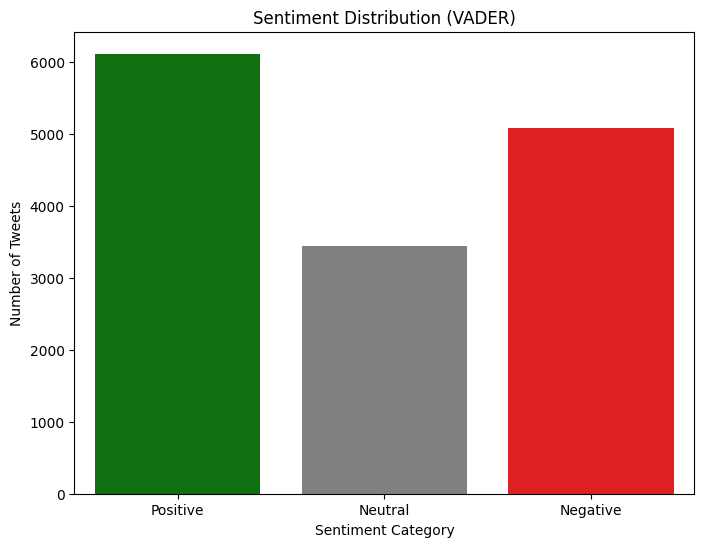

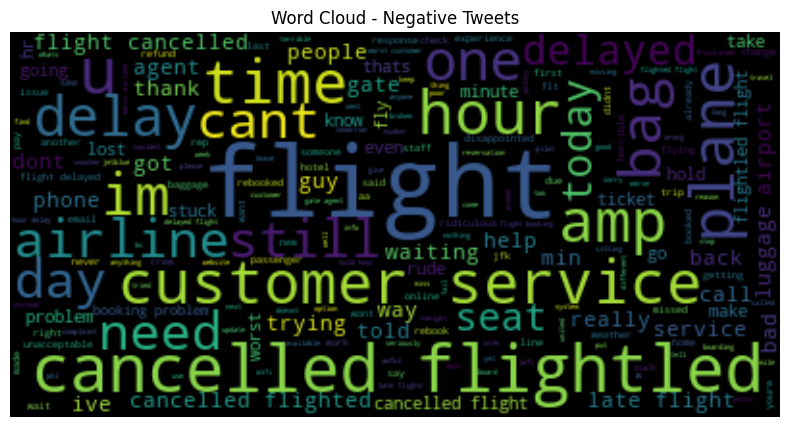

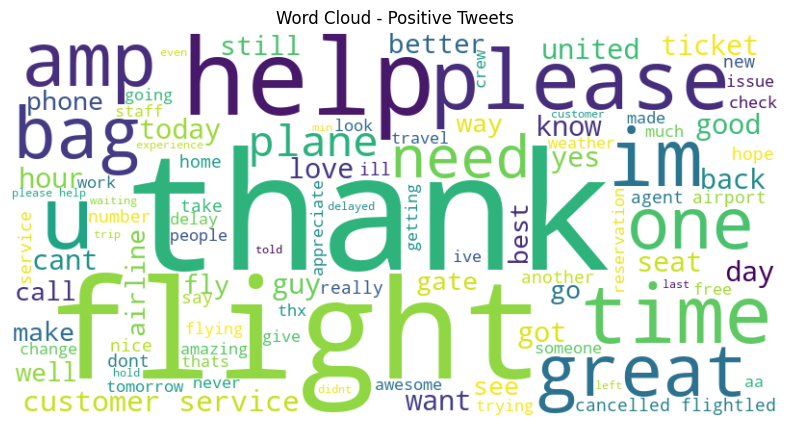

In [ ]:
#Evaluation and Visualization 

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='VADER_Sentiment', data=df, order=['Positive', 'Neutral', 'Negative'],
    palette={'Positive':'green', 'Neutral':'gray', 'Negative':'red'})
plt.title("Sentiment Distribution (VADER)")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Tweets")
plt.show()

# Generate separate word clouds
positive_text = " ".join(df[df['VADER_Sentiment']=='Positive']['Processed_Tweet'])
negative_text = " ".join(df[df['VADER_Sentiment']=='Negative']['Processed_Tweet'])

# Negative tweets word cloud
plt.figure(figsize=(10,5))
WordCloud(width=800, height=400, background_color='black', max_words=100).generate(negative_text)
plt.imshow(WordCloud().generate(negative_text), interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Tweets")
plt.show()

# Positive tweets word cloud
plt.figure(figsize=(10,5))
plt.imshow(WordCloud(width=800, height=400, background_color='white', max_words=100).generate(positive_text),
           interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Tweets")
plt.show()


In [ ]:
# Interpretation ---

print("Interpretation Guide:")
print("""
Themes Driving Negativity:
- Words about delays, cancellations, customer service issues (e.g., 'flight', 'delay', 'service', 'customer').

Themes Driving Positivity:
- Words expressing satisfaction and gratitude (e.g., 'thank', 'great', 'love', 'good', 'on time').

Conclusion:
- Negativity is often tied to poor service experiences, while positivity reflects appreciation and smooth travel.
""")


🧩 Interpretation Guide:

Themes Driving Negativity:
- Words about delays, cancellations, customer service issues (e.g., 'flight', 'delay', 'service', 'customer').

Themes Driving Positivity:
- Words expressing satisfaction and gratitude (e.g., 'thank', 'great', 'love', 'good', 'on time').

Conclusion:
- Negativity is often tied to poor service experiences, while positivity reflects appreciation and smooth travel.

